In [7]:
from astropy.table import QTable
from astropy.io import fits

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/')
from rotation_curve_v2_1 import extract_data
from rotation_curve_v2_1_functions import build_mask
from mapSmoothness_functions import how_smooth

import matplotlib.pyplot as plt
%matplotlib inline

## Galaxy data

In [2]:
galaxies = QTable.read('../master_file_vflag_10.txt', format='ascii.ecsv')

galaxies['smoothness_score'] = -1.

## Calculate smoothness scores

In [4]:
for i in range(len(galaxies)):
    
    ############################################################################
    # Build galaxy file name
    #---------------------------------------------------------------------------
    plate = galaxies['MaNGA_plate'][i]
    fiber = galaxies['MaNGA_fiberID'][i]
    
    galaxy_fits_filename = '../manga_files/MaNGA_DR15/' + str(plate) + '/manga-' + str(plate) + '-' + str(fiber) + '.Pipe3D.cube.fits.gz'
    ############################################################################


    ############################################################################
    # Read in data
    #---------------------------------------------------------------------------
    _, Ha_vel, Ha_vel_error, v_band, v_band_err, sMass_density,_,_,_,_ = extract_data( galaxy_fits_filename)


    data_mask = build_mask( Ha_vel_error, v_band, v_band_err, sMass_density)
    ############################################################################


    ############################################################################
    # Calculate degree of smoothness of velocity map
    #---------------------------------------------------------------------------
    smoothness_score = how_smooth( Ha_vel, data_mask)

    galaxies['smoothness_score'][i] = smoothness_score
    ############################################################################
    
galaxies.write('../master_file_vflag_10_smooth.txt', format='ascii.ecsv')

/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/mapSmoothness_functions.py:93: RuntimeWarning: invalid value encountered in true_divide
  return score/num_unmasked_spaxels


(array([  3.,   2.,   4.,   4.,   4.,   3.,   2.,   3.,   1.,   2.,   4.,
          1.,   3.,  10.,   4.,   4.,  10.,  18.,  22.,  17.,  24.,  26.,
         28.,  31.,  35.,  36.,  56.,  46.,  48.,  49.,  63.,  72.,  63.,
         71.,  66.,  69.,  75.,  73.,  74.,  83.,  84.,  75.,  86.,  77.,
         78.,  85.,  79.,  75.,  69.,  75.,  62.,  53.,  66.,  74.,  60.,
         55.,  52.,  54.,  51.,  47.,  57.,  38.,  35.,  46.,  53.,  49.,
         51.,  53.,  73.,  72.,  76.,  73., 110., 109., 141., 164., 158.,
        167., 165., 127.,  73.,  57.,  35.,  15.,  17.,   7.,   1.,   3.,
          3.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.0328494 , 0.06569879, 0.09854819, 0.13139758,
        0.16424698, 0.19709637, 0.22994577, 0.26279516, 0.29564456,
        0.32849395, 0.36134335, 0.39419274, 0.42704214, 0.45989153,
        0.49274093, 0.52559032, 0.55843972, 0.59128912, 0.62413851,
        0.65698791, 0.6898373 , 0.7226867 , 0.

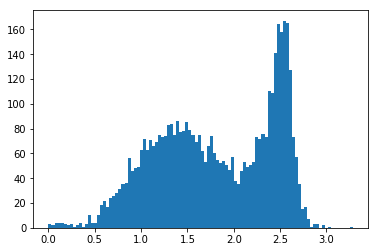

In [9]:
plt.figure()
plt.hist(galaxies['smoothness_score'], bins=100)